In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akhilp

In [3]:
df = pd.read_csv("NSL_TRAIN.csv", header=None)

In [4]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

# display 5 rows
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

# display 5 rows
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [11]:
#Convert Malicious packets into true and normal into false

df['Target'] = df['outcome'] != 'normal'
df = df.drop('outcome', axis=1)

df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,False
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,False
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,True
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,False
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,False


In [12]:
#Split Features 
x = df.drop(['protocol_type', 'service', 'flag', 'Target'], axis=1)
y = df[['Target']]

In [13]:
#Scale the data using Standard scaler with Mean = 0 and SD = 1

# Get column names from features
col_names = x.columns
# Creating Scaler object
scaler_object = preprocessing.StandardScaler()
# Fit data within the scaler object
scaled_df = scaler_object.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=col_names)

# concat into x feature 
x = pd.DataFrame(scaled_df)

x[0:5]


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387


In [14]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['Target'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[1 0]
 [1 0]
 [0 1]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [15]:
#Perform PCA on the feature vector to get a more precise accuracy on the dataset. Rescale from 78 features to 2 features.

pca=PCA(n_components = 2)
pca.fit(x)
x_pca = pca.transform(x)
print ("original shape:   ", x.shape)
print ("transformed shape:",x_pca.shape)

x = x_pca

original shape:    (125973, 38)
transformed shape: (125973, 2)


In [46]:
#Split into test and training sets. 25% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [58]:
# Create Neural Network, with 3 hidden layers and 1 output layer being subjected to the softmax probability function

#model = Sequential()

#model.add(Dense(160, input_dim = x.shape[1], activation='relu', kernel_initializer='normal'))
#model.add(Dense(100, input_dim = x.shape[1], activation='relu', kernel_initializer='normal', )) 
#model.add(Dense(50, input_dim = x.shape[1],  activation='relu', kernel_initializer='normal',)) 
#model.add(Dense(y.shape[1],activation='softmax')) #takes in an input and spits out 1D vector

#Add in hyper parameters
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
#Early stopping used to stop model from over or under fitting - stops when accuracy is no longer improving 
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=6, verbose=3, mode='auto', restore_best_weights=False, baseline=None)
#Fit the model
#history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=10)

Train on 88181 samples, validate on 37792 samples
Epoch 1/10
88181/88181 [==============================] - 4s 46us/step - loss: 0.1652 - acc: 0.9302 - val_loss: 0.1556 - val_acc: 0.9337
Epoch 2/10
88181/88181 [==============================] - 4s 42us/step - loss: 0.1463 - acc: 0.9392 - val_loss: 0.1425 - val_acc: 0.9399
Epoch 3/10
88181/88181 [==============================] - 4s 42us/step - loss: 0.1404 - acc: 0.9405 - val_loss: 0.1391 - val_acc: 0.9395
Epoch 4/10
88181/88181 [==============================] - 4s 42us/step - loss: 0.1366 - acc: 0.9411 - val_loss: 0.1421 - val_acc: 0.9381
Epoch 5/10
88181/88181 [==============================] - 4s 42us/step - loss: 0.1340 - acc: 0.9418 - val_loss: 0.1332 - val_acc: 0.9380
Epoch 6/10
88181/88181 [==============================] - 4s 42us/step - loss: 0.1318 - acc: 0.9413 - val_loss: 0.1289 - val_acc: 0.9420
Epoch 7/10
88181/88181 [==============================] - 4s 42us/step - loss: 0.1304 - acc: 0.9425 - val_loss: 0.1305 - val_acc

In [59]:

# Measure accuracy
#predictors = model.predict(x_test)
#predictors = np.argmax(predictors,axis=1)
#prediction = np.argmax(y_test,axis=1)
#score = metrics.accuracy_score(prediction, predictors)
#print("Accuracy:", score * 100,"%")

Accuracy: 94.32154953429297 %


In [53]:
#model.get_weights()

[array([[0.82369083, 1.0223253 , 0.8195675 , 1.1169918 , 1.1286916 ,
         1.7626137 , 1.0854765 , 1.1910725 , 1.2842535 , 1.0309751 ,
         1.0345886 , 1.2516048 , 1.1286511 , 1.0573026 , 0.8493241 ,
         1.2389632 , 1.0639536 , 0.7581723 , 0.9699465 , 1.0051109 ,
         1.0995132 , 0.8444589 , 1.3288541 , 0.9020571 , 1.002385  ,
         1.2416838 , 1.0327598 , 1.0792491 , 1.0542768 , 1.2812692 ,
         0.8881188 , 1.0704399 , 1.0545334 , 0.98669165, 1.1935011 ,
         1.248951  , 0.84194666, 1.0384427 , 0.99580544, 0.8832241 ,
         1.0422804 , 0.8898041 , 0.99496526, 1.0101618 , 1.0336215 ,
         0.9853934 , 1.7262812 , 1.1849607 , 1.0354943 , 1.147804  ,
         1.2369174 , 1.0930464 , 1.1815846 , 1.3194196 , 1.0347652 ,
         1.0613655 , 0.90823245, 1.0869176 , 1.1516762 , 1.1873454 ,
         0.85577995, 1.0893216 , 1.1867561 , 1.1925778 , 1.0923548 ,
         1.034209  , 1.1313574 , 1.0771352 , 1.0819448 , 0.88802004,
         0.99329233, 1.1334677 , 1

In [146]:
from sklearn.neural_network import MLPClassifier 

classifier = MLPClassifier(hidden_layer_sizes=(80,40,20), 
                           max_iter=50,activation = 'relu',solver='adam', 
                           early_stopping= True, learning_rate_init = 0.027, alpha = 1e-5, 
                           verbose = 5, random_state=42)
#Uses Log Loss function
#same as Categorical

In [140]:

#Fitting the training data to the network
classifier.fit(x_train, y_train)

Iteration 1, loss = 0.33458732
Validation score: 0.939109
Iteration 2, loss = 0.29714603
Validation score: 0.937975
Iteration 3, loss = 0.29002048
Validation score: 0.939336
Iteration 4, loss = 0.28728279
Validation score: 0.935140
Iteration 5, loss = 0.28199609
Validation score: 0.940016
Iteration 6, loss = 0.28005210
Validation score: 0.940923
Iteration 7, loss = 0.27661283
Validation score: 0.940129
Iteration 8, loss = 0.27413548
Validation score: 0.940810
Iteration 9, loss = 0.27195897
Validation score: 0.940696
Iteration 10, loss = 0.27230747
Validation score: 0.939562
Iteration 11, loss = 0.27429770
Validation score: 0.939676
Iteration 12, loss = 0.27349781
Validation score: 0.941830
Iteration 13, loss = 0.26953178
Validation score: 0.941377
Iteration 14, loss = 0.26745181
Validation score: 0.941830
Iteration 15, loss = 0.26913054
Validation score: 0.940243
Iteration 16, loss = 0.27265685
Validation score: 0.938542
Iteration 17, loss = 0.26692746
Validation score: 0.937975
Iterat

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(150, 60, 20), learning_rate='constant',
              learning_rate_init=0.027, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=5, warm_start=False)

In [141]:
#Predicting y for x_validation
y_pred = classifier.predict(x_test)

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis = 1), y_pred.argmax(axis = 1))

In [143]:
cm

array([[19715,   368],
       [ 1836, 15873]])

In [144]:
#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 19715
FP = 368
FN = 1836
TN = 15873

In [145]:
Acc = ((TP + TN)/(TP + TN + FP + FN))

print( "Accuracy", Acc)

Accuracy 0.9416807790008468


In [75]:
# Recall 

TPR = ((TP)/(TP + FN))

print("Recall", TPR)

Recall 0.9131180204809787


In [40]:
# Precision

PPV = ((TP)/(TP+FP))

print("Precision", PPV)

Precision 0.9854603395906986


In [41]:
#F1 Score 

F1 = ((2*TPR*PPV)/(TPR + PPV))

print ("F1 Score", F1)

F1 Score 0.9461455718895662


In [105]:
print([coef.shape for coef in classifier.coefs_])  # size of synapsis weights
classifier.coefs_    

[(2, 150), (150, 60), (60, 20), (20, 2)]


[array([[-7.42338083e-02,  2.63435444e-01,  1.50936407e-01,
          1.86398883e-01, -1.24414484e-01, -8.25093268e-02,
         -2.12155992e-01,  1.26022966e-01,  7.08256137e-02,
          1.10074949e-01, -2.37069037e-01,  1.71831258e-01,
          1.56898918e-01, -1.65326519e-01, -9.26667759e-02,
         -1.17396239e-01, -8.93040647e-02,  1.01106155e-02,
          3.17917769e-02, -1.19192833e-01,  5.61932920e-02,
         -8.75278158e-02, -7.61649497e-02,  2.54588882e-02,
         -1.20854586e-02,  1.04208420e-01, -5.22058243e-02,
          5.12291388e-02,  6.33428078e-02, -1.92207801e-01,
          1.13717772e-02, -6.66552583e-02, -3.03961484e-01,
          1.78008523e-01,  2.06469559e-01,  1.67007811e-01,
         -4.32187849e-02, -1.69426461e-01,  1.28508853e-01,
          3.00184214e-02, -8.46754822e-02,  1.97874003e-03,
         -2.54984091e-01,  1.79641253e-01, -5.51395586e-02,
          8.89340837e-02, -1.10151026e-01,  8.08488694e-02,
          1.91360829e-02, -1.39612071e-0

In [94]:
print([coef.shape for coef in classifier.coefs_])  # size of synapsis weights
classifier.coefs_    

[(2, 150), (150, 60), (60, 20), (20, 5), (5, 2)]


[array([[-2.24408764e-01,  3.54212414e-01,  2.08399803e-01,
          3.00605612e-01, -5.10397735e-02,  5.59272758e-02,
         -7.20930331e-02,  4.90207064e-01,  2.98237640e-01,
          3.43978566e-01, -1.47536056e-02,  3.42151081e-01,
          3.30805791e-01, -6.90940538e-02,  6.48591535e-02,
          2.74846772e-02,  5.45932304e-02,  2.32987875e-01,
          2.34193556e-01, -3.35301633e-02,  1.43368028e-01,
         -1.24086542e-01,  9.17910191e-02,  4.65468507e-02,
          1.02098704e-01,  1.06970105e-01, -2.03192464e-01,
          1.23970211e-01, -3.22942620e-02, -1.41604584e-01,
          2.28388558e-01,  1.01615589e-01, -2.77669239e-01,
          3.79944426e-01,  3.52384881e-01,  3.38360448e-01,
          9.70460735e-02,  3.93407777e-02,  3.16591711e-01,
          6.11845090e-08,  1.02801942e-01, -8.80721105e-02,
         -3.02230902e-01,  4.45314789e-01,  1.08663935e-01,
          1.68609401e-01,  6.27619570e-02,  4.59136742e-01,
          1.20775073e-02,  1.08910757e-0

Text(0.5, 0, 'number of steps')

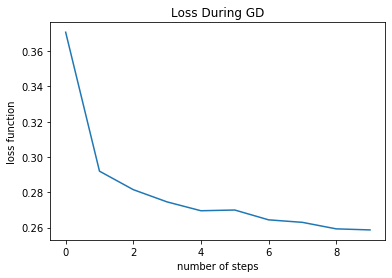

In [84]:
import matplotlib.pyplot as plt

plt.plot(classifier.loss_curve_)
plt.title('Loss During GD')
plt.ylabel('loss function')
plt.xlabel('number of steps')